In [1]:
!pip install -U -q pm4py

     |████████████████████████████████| 1.5 MB 6.8 MB/s 
     |████████████████████████████████| 748 kB 43.8 MB/s 
     |████████████████████████████████| 40 kB 2.1 MB/s 
     |████████████████████████████████| 1.6 MB 8.1 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pm4py 

# Review Example Dataset

In [54]:
xes_path = "/content/drive/MyDrive/data/review_example_large.xes"
log = pm4py.read_xes("/content/drive/MyDrive/data/review_example_large.xes")
xes_path = pm4py.convert_to_event_log(log)

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [55]:
type(xes_path)

pm4py.objects.log.obj.EventLog

Handover of Work

In [56]:
def handover_of_work(log):
#https://github.com/pm4py/pm4py-core/blob/74eb2a5977db7f28183ac74dbb5bb6f59570d479/pm4py/algo/organizational_mining/sna/algorithm.py
#https://github.com/pm4py/pm4py-core/blob/74eb2a5977db7f28183ac74dbb5bb6f59570d479/pm4py/org.py#L124
  from pm4py.visualization.sna import visualizer as sna_vis
  #from pm4py.algo.enhancement.sna import factory as sna_factory
  from pm4py.algo.organizational_mining.sna import algorithm as sna_factory

  ## networkx is a library for social network analysis
  import networkx as nx
  ## Create the handover network using the log
  handover_nw = sna_factory.log_handover.apply(log)
  ## Generate the network visualisation
  gviz_hw_py = sna_vis.networkx.apply(handover_nw)


  ## Display the network
  return sna_vis.networkx.view(gviz_hw_py)




# Second methods to do the same function


  #from pm4py import org
  #from pm4py.visualization.sna import visualizer as sna_vis
  ## networkx is a library for social network analysis
  #import networkx as nx
  ## Create the handover network using the log
  #handover_nw = org.discover_handover_of_work_network(log)
  ## Generate the network visualisation
  #gviz_hw_py = sna_vis.networkx.apply(handover_nw)

  
  ## Display the network
  #return sna_vis.networkx.view(gviz_hw_py)

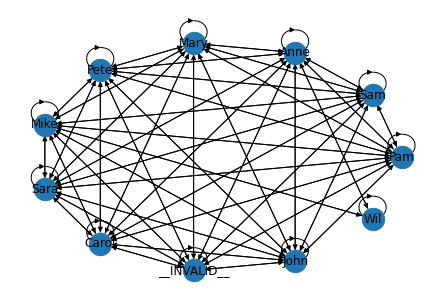

In [57]:
handover_of_work(xes_path)

Subcontracting

In [58]:
def subcontracting(log):
  from pm4py import org
  from pm4py.visualization.sna import visualizer as sub_vis
  ## networkx is a library for social network analysis
  import networkx as nx
  ## Create the handover network using the log
  
  subcontracting = org.discover_subcontracting_network(log)
  ## Generate the network visualisation
  gviz_subcontracting_py = sub_vis.networkx.apply(subcontracting)

  
  ## Display the network
  return sub_vis.networkx.view(gviz_subcontracting_py)

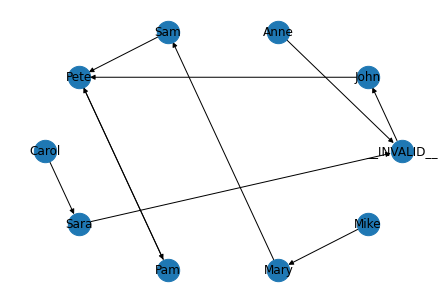

In [59]:
subcontracting(xes_path)

Working Together

In [60]:
def working_together(log):
  from pm4py import org
  from pm4py.visualization.sna import visualizer as work_tog_vis
  ## networkx is a library for social network analysis
  import networkx as nx
  ## Create the handover network using the log
  working_together = org.discover_working_together_network(log)
  ## Generate the network visualisation
  gviz_work_together_py = work_tog_vis.networkx.apply(working_together)

  
  ## Display the network
  return work_tog_vis.networkx.view(gviz_work_together_py)

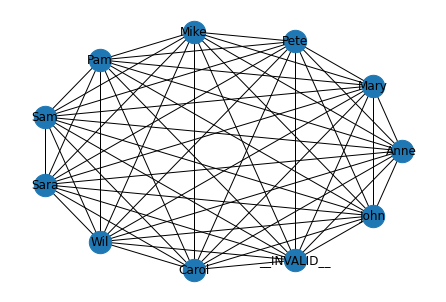

In [61]:
working_together(xes_path)

Similar Activities

In [62]:
def similar_activities(log):
  from pm4py import org
  from pm4py.visualization.sna import visualizer as sim_act_vis
  ## networkx is a library for social network analysis
  import networkx as nx
  ## Create the handover network using the log
  similar_activities = org.discover_activity_based_resource_similarity(log)
  ## Generate the network visualisation
  gviz_simact_py = sim_act_vis.networkx.apply(similar_activities)

  
  ## Display the network
  return sim_act_vis.networkx.view(gviz_simact_py)

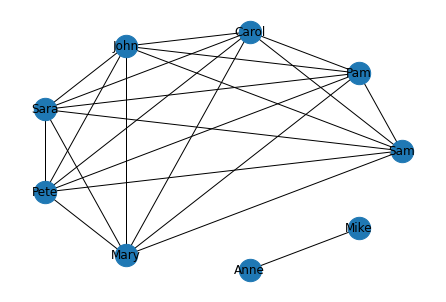

In [63]:
similar_activities(xes_path)

Roles Discovery

In [64]:
def role_discovery(log):
  from pm4py import org
  from pm4py.visualization.sna import visualizer as role_vis
  ## networkx is a library for social network analysis
  import networkx as nx
  ## Create the handover network using the log
  roles = org.discover_organizational_roles(log)

  # prints a list of a set of activities in the log that are executed by a similar (multi)set of resources. 
  [print(i) for i in roles]

In [65]:
role_discovery(xes_path)

Activities: ['accept', 'collect reviews', 'invite additional reviewer', 'invite reviewers', 'reject'] Originators importance {'Mike': 72082, 'Anne': 72158}
Activities: ['decide'] Originators importance {'Wil': 20000}
Activities: ['get review 1', 'get review 2', 'get review 3', 'get review X'] Originators importance {'Pam': 5180, 'John': 5157, 'Carol': 5146, 'Sara': 5195, 'Pete': 5233, 'Mary': 5175, 'Sam': 5143}
Activities: ['time-out 1', 'time-out 2', 'time-out 3', 'time-out X'] Originators importance {'__INVALID__': 35891}


Clustering (SNA results)

In [66]:
#Clustering the results of the working together metric, individuals that work often together would be inserted in the same group.
#Clustering the results of the similar activities metric, individuals that work on the same tasks would be inserted in the same group.

def clustering(log):
  from pm4py import org
  ## Create clustering using the log
  similar_activities = org.discover_activity_based_resource_similarity(log)
  working_together = org.discover_working_together_network(log)

  from pm4py.algo.organizational_mining.sna import util
  similar_activity_cluster_metric = util.cluster_affinity_propagation(similar_activities)
  working_together_cluster_metric = util.cluster_affinity_propagation(working_together)


  return print('clustered similar activities metric: {}\n working together clustered metric: {}'.format(similar_activity_cluster_metric,working_together_cluster_metric) )

In [67]:
clustering(xes_path)

clustered similar activities metric: {'1': ['Sam', 'Pam', 'Pete', 'Sara', 'Carol', 'John', 'Mary'], '0': ['Wil', '__INVALID__', 'Anne', 'Mike']}
 working together clustered metric: {'3': ['Sam', 'Pam', 'Pete', 'Sara', 'Carol', 'John', 'Mary'], '0': ['Wil'], '1': ['__INVALID__'], '2': ['Anne'], '4': ['Mike']}


Resource Profiles

In [68]:
def resource_profile(log):
  from pm4py.algo.organizational_mining.resource_profiles import algorithm
  #print("The average number of activities started by Wil but not completed between", pd.to_datetime(2010-12-30 00:00:00) 'and ' pd.to_datetime(2011-01-15 00:00:00), \
        #algorithm.average_workload(log, "2010-12-30 00:00:00", "2011-01-15 00:00:00", "Wil"))

  #print("The average duration of cases completed between 12/30/2010 and 12/30/2011 in which Sue was involved:",algorithm.average_case_duration(log, "2010-12-30 00:00:00", "2011-12-30 00:00:00", "Sue", "collect reviews"))

  print("The average duration of instances of Collecting Reviews completed between 2010-12-30 and 2018-12-30 by Mike:", algorithm.average_duration_activity(log, "2010-12-30 00:00:00", "2018-12-30 00:00:00", "Mike", "collect reviews"))
  print("number of distinct activities done by Sara between 12/30/2010 and 12/30/2011):", algorithm.distinct_activities(log, "2010-12-30 00:00:00", "2011-12-30 00:00:00", "Sara"))
  print("number of activity instances completed by a Sara between 12/30/2010 and 12/30/2011:", algorithm.activity_completions(log, "2010-12-30 00:00:00", "2011-12-30 00:00:00", "Sara"))
  print("number of cases completed between 2010-12-30 and 2018-12-30  which Pete was involved:", algorithm.case_completions(log, "2010-12-30 00:00:00", "2018-12-30 00:00:00", "Pete"))
  print("fraction of cases completed during a given time slot in which Pete was involved with respect to the total number of cases completed between 2010-12-30 and 2018-12-30:",algorithm.fraction_case_completions(log, "2010-12-30 00:00:00", "2018-12-30 00:00:00", "Pete"))
  print("The fraction of active time during which Wil is involved in more than one activity with respect to the resource's active time:", algorithm.multitasking(log, "2010-12-30 00:00:00", "2011-01-25 00:00:00", "Wil"))
  print("The average duration of instances of Collecting Reviews completed between 2010-12-30 and  2011-01-25 by Mike:", algorithm.average_duration_activity(log, "2010-12-30 00:00:00", "2011-01-25 00:00:00", "Mike", "collect reviews"))
  #print("The average duration of cases completed between 12/30/2010 and 12/30/2011 in which Sue was involved:",algorithm.average_case_duration(log, "2010-12-30 00:00:00", "2011-12-30 00:00:00", "Sue"))
  print("number of cases completed between 2010-12-30 2020-12-30 which Carol and John were involved:", algorithm.interaction_two_resources(log, "2010-12-30 00:00:00", "2020-12-30 00:00:00", "Carol", "John"))
  print("fraction of resources involved in the same cases with Carol during 2010-12-30 with respect to the total number of resources active until 2017-12-30:",algorithm.social_position(log, "2010-12-30 00:00:00", "2017-12-30 00:00:00", "Carol"))

In [69]:
resource_profile(xes_path)

The average duration of instances of Collecting Reviews completed between 2010-12-30 and 2018-12-30 by Mike: 1134416.8421052631
number of distinct activities done by Sara between 12/30/2010 and 12/30/2011): 4
number of activity instances completed by a Sara between 12/30/2010 and 12/30/2011: 20
number of cases completed between 2010-12-30 and 2018-12-30  which Pete was involved: 85
fraction of cases completed during a given time slot in which Pete was involved with respect to the total number of cases completed between 2010-12-30 and 2018-12-30: 0.40476190476190477
The fraction of active time during which Wil is involved in more than one activity with respect to the resource's active time: 0.8421052631578947
The average duration of instances of Collecting Reviews completed between 2010-12-30 and  2011-01-25 by Mike: 1317600.0
number of cases completed between 2010-12-30 2020-12-30 which Carol and John were involved: 48
fraction of resources involved in the same cases with Carol during 

/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:492: UserWarning: the EventStream class has been deprecated and will be removed in a future release.
  warnings.warn("the EventStream class has been deprecated and will be removed in a future release.")


Organizational Mining


In [70]:
def organizational_mining(log):
  from pm4py.algo.organizational_mining.local_diagnostics import algorithm as local_diagnostics

    # this applies the organizational mining from an attribute that is in each event, describing the group that is performing the task.
  ld = local_diagnostics.apply_from_group_attribute(log, parameters={local_diagnostics.Parameters.GROUP_KEY: "org:resource"})
    # GROUP RELATIVE FOCUS (on a given type of work) specifies how much a resource group performed this type of work
    # compared to the overall workload of the group. It can be used to measure how the workload of a resource group
    # is distributed over different types of work, i.e., work diversification of the group.
  print("\ngroup_relative_focus")
  print(ld["group_relative_focus"])
    # GROUP RELATIVE STAKE (in a given type of work) specifies how much this type of work was performed by a certain
    # resource group among all groups. It can be used to measure how the workload devoted to a certain type of work is
    # distributed over resource groups in an organizational model, i.e., work participation by different groups.
  print("\ngroup_relative_stake")
  print(ld["group_relative_stake"])
    # GROUP COVERAGE with respect to a given type of work specifies the proportion of members of a resource group that
    # performed this type of work.
  print("\ngroup_coverage")
  print(ld["group_coverage"])
    # GROUP MEMBER CONTRIBUTION of a member of a resource group with respect to the given type of work specifies how
    # much of this type of work by the group was performed by the member. It can be used to measure how the workload
    # of the entire group devoted to a certain type of work is distributed over the group members.
  print("\ngroup_member_contribution")
  print(ld["group_member_contribution"])
                    

In [71]:
organizational_mining(xes_path)


group_relative_focus
{'Mike': {'invite reviewers': 0.4975, 'get review 3': 0.0, 'get review 1': 0.0, 'time-out 2': 0.0, 'collect reviews': 0.5028, 'decide': 0.0, 'invite additional reviewer': 0.4985280151946819, 'get review X': 0.0, 'reject': 0.5097323600973236, 'time-out 1': 0.0, 'get review 2': 0.0, 'time-out X': 0.0, 'accept': 0.4984214680347277, 'time-out 3': 0.0}, 'Mary': {'invite reviewers': 0.0, 'get review 3': 0.14037216828478966, 'get review 1': 0.1429140127388535, 'time-out 2': 0.0, 'collect reviews': 0.0, 'decide': 0.0, 'invite additional reviewer': 0.0, 'get review X': 0.14313264346190027, 'reject': 0.0, 'time-out 1': 0.0, 'get review 2': 0.14397120575884823, 'time-out X': 0.0, 'accept': 0.0, 'time-out 3': 0.0}, 'Pam': {'invite reviewers': 0.0, 'get review 3': 0.14826051779935276, 'get review 1': 0.14709394904458598, 'time-out 2': 0.0, 'collect reviews': 0.0, 'decide': 0.0, 'invite additional reviewer': 0.0, 'get review X': 0.14167450611476953, 'reject': 0.0, 'time-out 1':

# BPI 2012 Challenge Dataset

In [4]:
bpi2012_log = pm4py.read_xes('/content/drive/MyDrive/data/BPI_2012_W_complete.xes')
bpi2012_log

parsing log, completed traces ::   0%|          | 0/9658 [00:00<?, ?it/s]

,lifecycle:transition,time:timestamp,(case)_AMOUNT_REQ,concept:name,case:concept:name,case:variant,case:variant-index,case:creator,org:resource
0,complete,2011-10-01 09:45:13.917000+00:00,20000,W_Completeren aanvraag,173688,Variant 14,14,Fluxicon Disco,NaN
1,complete,2011-10-01 10:17:08.924000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,NaN
2,complete,2011-10-08 14:32:00.886000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,10913
3,complete,2011-10-10 09:33:05.791000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,11049
4,complete,2011-10-13 08:37:37.026000+00:00,20000,W_Valideren aanvraag,173688,Variant 14,14,Fluxicon Disco,10629
...,...,...,...,...,...,...,...,...,...
72408,complete,2012-03-01 08:28:21.228000+00:00,20000,W_Afhandelen leads,214370,Variant 1,1,Fluxicon Disco,11169
72409,complete,2012-03-01 08:27:52.388000+00:00,8500,W_Afhandelen leads,214373,Variant 86,86,Fluxicon Disco,11169
72410,complete,2012-03-01 19:22:41.157000+00:00,8500,W_Completeren aanvraag,214373,Variant 86,86,Fluxicon Disco,10933
72411,complete,2012-03-10 11:50:54.881000+00:00,8500,W_Nabellen offertes,214373,Variant 86,86,Fluxicon Disco,11119


In [5]:
bpi2012_log['concept:name'].nunique()

6

In [6]:
bpi2012_log['org:resource'].nunique()

59

In [7]:
#create fake names for the resource column
!pip install Faker
!pip install Dumper 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from faker import Faker
import random

faker = Faker()
name = [faker.name() for i in range(56)]
bpi2012_log['name'] = [random.choice(name) for i in bpi2012_log['org:resource']]
bpi2012_log['org:resource'] = bpi2012_log['name']
bpi2012_log.drop('name', axis=1)

,lifecycle:transition,time:timestamp,(case)_AMOUNT_REQ,concept:name,case:concept:name,case:variant,case:variant-index,case:creator,org:resource
0,complete,2011-10-01 09:45:13.917000+00:00,20000,W_Completeren aanvraag,173688,Variant 14,14,Fluxicon Disco,Jennifer Thomas MD
1,complete,2011-10-01 10:17:08.924000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,Robert Peters
2,complete,2011-10-08 14:32:00.886000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,Christina Barnes
3,complete,2011-10-10 09:33:05.791000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,David Adams
4,complete,2011-10-13 08:37:37.026000+00:00,20000,W_Valideren aanvraag,173688,Variant 14,14,Fluxicon Disco,William Arroyo
...,...,...,...,...,...,...,...,...,...
72408,complete,2012-03-01 08:28:21.228000+00:00,20000,W_Afhandelen leads,214370,Variant 1,1,Fluxicon Disco,Travis Edwards
72409,complete,2012-03-01 08:27:52.388000+00:00,8500,W_Afhandelen leads,214373,Variant 86,86,Fluxicon Disco,Jennifer Collier
72410,complete,2012-03-01 19:22:41.157000+00:00,8500,W_Completeren aanvraag,214373,Variant 86,86,Fluxicon Disco,Emily Rice
72411,complete,2012-03-10 11:50:54.881000+00:00,8500,W_Nabellen offertes,214373,Variant 86,86,Fluxicon Disco,Mary Thompson


In [9]:
bpi2012_log

,lifecycle:transition,time:timestamp,(case)_AMOUNT_REQ,concept:name,case:concept:name,case:variant,case:variant-index,case:creator,org:resource,name
0,complete,2011-10-01 09:45:13.917000+00:00,20000,W_Completeren aanvraag,173688,Variant 14,14,Fluxicon Disco,Jennifer Thomas MD,Jennifer Thomas MD
1,complete,2011-10-01 10:17:08.924000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,Robert Peters,Robert Peters
2,complete,2011-10-08 14:32:00.886000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,Christina Barnes,Christina Barnes
3,complete,2011-10-10 09:33:05.791000+00:00,20000,W_Nabellen offertes,173688,Variant 14,14,Fluxicon Disco,David Adams,David Adams
4,complete,2011-10-13 08:37:37.026000+00:00,20000,W_Valideren aanvraag,173688,Variant 14,14,Fluxicon Disco,William Arroyo,William Arroyo
...,...,...,...,...,...,...,...,...,...,...
72408,complete,2012-03-01 08:28:21.228000+00:00,20000,W_Afhandelen leads,214370,Variant 1,1,Fluxicon Disco,Travis Edwards,Travis Edwards
72409,complete,2012-03-01 08:27:52.388000+00:00,8500,W_Afhandelen leads,214373,Variant 86,86,Fluxicon Disco,Jennifer Collier,Jennifer Collier
72410,complete,2012-03-01 19:22:41.157000+00:00,8500,W_Completeren aanvraag,214373,Variant 86,86,Fluxicon Disco,Emily Rice,Emily Rice
72411,complete,2012-03-10 11:50:54.881000+00:00,8500,W_Nabellen offertes,214373,Variant 86,86,Fluxicon Disco,Mary Thompson,Mary Thompson


In [10]:
bpi2012_log['name'].nunique()

56

In [12]:
pm4py.write_xes(bpi2012_log, '/content/drive/MyDrive/Abou Keita - Capstone 606/Datasets/cleaned_bpi2012_log.xes')

exporting log, completed traces ::   0%|          | 0/9658 [00:00<?, ?it/s]

In [197]:
bpi2012_log = pm4py.convert_to_event_log(bpi2012_log)

/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


Handover of Work

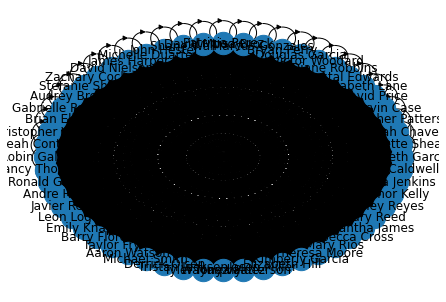

In [198]:
handover_of_work(bpi2012_log)

Subcontracting

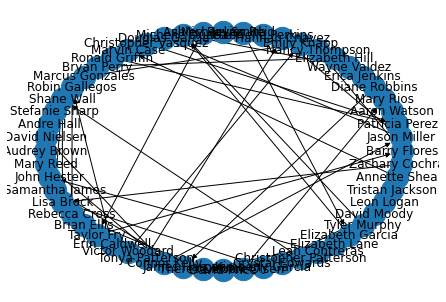

In [199]:
subcontracting(bpi2012_log)

Working Together

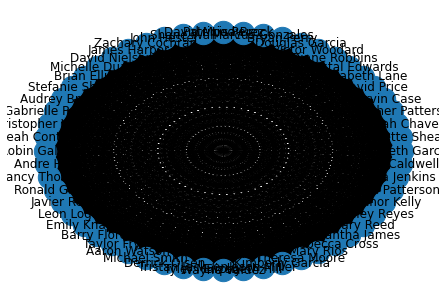

In [200]:
working_together(bpi2012_log)

Similar Activities

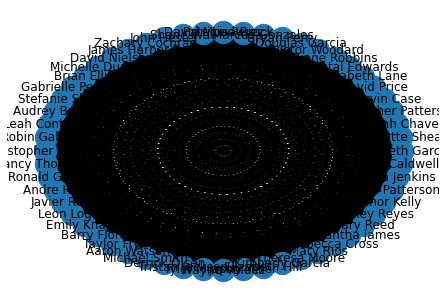

In [201]:
similar_activities(bpi2012_log)

Roles Discovery

In [202]:
role_discovery(bpi2012_log)

Activities: ['W_Afhandelen leads', 'W_Beoordelen fraude', 'W_Completeren aanvraag', 'W_Nabellen incomplete dossiers', 'W_Nabellen offertes', 'W_Valideren aanvraag'] Originators importance {'Elizabeth Garcia': 1259, 'Christopher Vasquez': 1360, 'Diane Robbins': 1261, 'Aaron Watson': 1358, 'Connor Kelly': 1319, 'Marvin Case': 1268, 'Derrick Olsen': 1284, 'Rebecca Cross': 1245, 'Robin Gallegos': 1315, 'Ashley Reyes': 1300, 'Marcus Gonzales': 1309, 'Annette Shea': 1343, 'Shane Wall': 1278, 'Gabrielle Perkins': 1287, 'Patricia Perez': 1363, 'Emily Knapp': 1270, 'Erin Caldwell': 1360, 'Hannah Chavez': 1241, 'Javier Reid': 1323, 'Crystal Edwards': 1359, 'Tonya Patterson': 1346, 'Jason Miller': 1249, 'Theresa Moore': 1247, 'Taylor Fry': 1272, 'Kimberly Garcia': 1291, 'Elizabeth Hill': 1248, 'David Moody': 1279, 'Mary Rios': 1323, 'Stefanie Sharp': 1312, 'Samantha James': 1309, 'James Harper': 1270, 'Tyler Murphy': 1246, 'David Nielsen': 1268, 'Ronald Griffin': 1309, 'Elizabeth Lane': 1255, 'Ma

Clustering (SNA results)

In [203]:
clustering(bpi2012_log)

clustered similar activities metric: {'0': ['Connor Kelly', 'Patricia Perez', 'Brian Ellis', 'Leah Contreras', 'Mary Rios', 'Michael Smith', 'Audrey Brown', 'Christopher Patterson', 'Annette Shea', 'Bryan Perry'], '2': ['Taylor Fry', 'Shane Wall', 'Robin Gallegos', 'Tyler Murphy', 'Douglas Garcia', 'Marvin Case', 'Samantha James', 'Erica Jenkins', 'David Price', 'Victor Woodard', 'Elizabeth Lane', 'Leon Logan', 'Erin Caldwell', 'Javier Reid', 'Mary Reed', 'Zachary Cochran', 'Diane Robbins', 'Ronald Griffin', 'Christopher Vasquez', 'Tristan Jackson', 'Rebecca Cross', 'David Moody', 'Wayne Valdez', 'David Nielsen', 'Stefanie Sharp', 'John Hester', 'James Harper', 'Kimberly Garcia', 'Crystal Edwards', 'Gabrielle Perkins', 'Elizabeth Hill', 'Derrick Olsen', 'Nancy Thompson'], '1': ['Barry Flores', 'Marcus Gonzales', 'Elizabeth Garcia', 'Hannah Chavez', 'Lisa Brock', 'Andre Hall', 'Michelle Duarte', 'Aaron Watson', 'Ashley Reyes', 'Theresa Moore', 'Emily Knapp', 'Tonya Patterson', 'Jason Mi

Resource Profiles

In [204]:
#resource_profile(bpi2012_log)

Organizational Mining


In [205]:
organizational_mining(bpi2012_log)


group_relative_focus
{'James Harper': {'W_Completeren aanvraag': 0.01702340718487921, 'W_Nabellen offertes': 0.017844707520891366, 'W_Valideren aanvraag': 0.016719442685243825, 'W_Afhandelen leads': 0.01780264496439471, 'W_Nabellen incomplete dossiers': 0.01823441746296134, 'W_Beoordelen fraude': 0.025925925925925925}, 'Michael Smith': {'W_Completeren aanvraag': 0.01814995618976092, 'W_Nabellen offertes': 0.01806232590529248, 'W_Valideren aanvraag': 0.01760607979734009, 'W_Afhandelen leads': 0.015598507968802983, 'W_Nabellen incomplete dossiers': 0.018760410274392916, 'W_Beoordelen fraude': 0.011111111111111112}, 'Bryan Perry': {'W_Completeren aanvraag': 0.018316852338632287, 'W_Nabellen offertes': 0.015973189415041784, 'W_Valideren aanvraag': 0.018746041798606713, 'W_Afhandelen leads': 0.014750762970498474, 'W_Nabellen incomplete dossiers': 0.01770842465152976, 'W_Beoordelen fraude': 0.018518518518518517}, 'David Price': {'W_Completeren aanvraag': 0.01627237451495807, 'W_Nabellen off

# HelpDesk Dataset

In [13]:
HelpDesk_log = pm4py.read_xes('/content/drive/MyDrive/data/Helpdesk.xes')
HelpDesk_log

parsing log, completed traces ::   0%|          | 0/4580 [00:00<?, ?it/s]

,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,case:concept:name,case:variant,case:variant-index,case:creator
0,Assign seriousness,complete,Value 1,2012-10-09 11:50:17+00:00,Assign seriousness,Value 1,Case1,Variant 12,12,Fluxicon Disco
1,Take in charge ticket,complete,Value 1,2012-10-09 11:51:01+00:00,Take in charge ticket,Value 1,Case1,Variant 12,12,Fluxicon Disco
2,Take in charge ticket,complete,Value 2,2012-10-12 12:02:56+00:00,Take in charge ticket,Value 2,Case1,Variant 12,12,Fluxicon Disco
3,Resolve ticket,complete,Value 1,2012-10-25 08:54:26+00:00,Resolve ticket,Value 1,Case1,Variant 12,12,Fluxicon Disco
4,Closed,complete,Value 3,2012-11-09 10:54:39+00:00,Closed,Value 3,Case1,Variant 12,12,Fluxicon Disco
...,...,...,...,...,...,...,...,...,...,...
21343,Closed,complete,Value 5,2010-09-02 07:11:00+00:00,Closed,Value 5,Case4579,Variant 1,1,Fluxicon Disco
21344,Take in charge ticket,complete,Value 6,2012-01-03 07:33:43+00:00,Take in charge ticket,Value 6,Case4580,Variant 18,18,Fluxicon Disco
21345,Wait,complete,Value 6,2012-01-10 13:30:11+00:00,Wait,Value 6,Case4580,Variant 18,18,Fluxicon Disco
21346,Resolve ticket,complete,Value 6,2012-01-10 15:07:40+00:00,Resolve ticket,Value 6,Case4580,Variant 18,18,Fluxicon Disco


In [14]:
HelpDesk_log['concept:name'].nunique()

14

In [15]:
HelpDesk_log['org:resource'].nunique()

22

In [16]:
#create fake name for each of the 'org:resource' attribute since 
from faker import Faker
import random

faker = Faker()
names = [faker.name() for i in range(22)]
HelpDesk_log['name'] = [random.choice(names) for i in HelpDesk_log['org:resource']]
HelpDesk_log['org:resource'] = HelpDesk_log['name']
HelpDesk_log.drop('name', axis=1)

,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,case:concept:name,case:variant,case:variant-index,case:creator
0,Assign seriousness,complete,Kelly Williams,2012-10-09 11:50:17+00:00,Assign seriousness,Value 1,Case1,Variant 12,12,Fluxicon Disco
1,Take in charge ticket,complete,Angelica Smith,2012-10-09 11:51:01+00:00,Take in charge ticket,Value 1,Case1,Variant 12,12,Fluxicon Disco
2,Take in charge ticket,complete,James Rogers,2012-10-12 12:02:56+00:00,Take in charge ticket,Value 2,Case1,Variant 12,12,Fluxicon Disco
3,Resolve ticket,complete,Martin Burton,2012-10-25 08:54:26+00:00,Resolve ticket,Value 1,Case1,Variant 12,12,Fluxicon Disco
4,Closed,complete,James Rogers,2012-11-09 10:54:39+00:00,Closed,Value 3,Case1,Variant 12,12,Fluxicon Disco
...,...,...,...,...,...,...,...,...,...,...
21343,Closed,complete,Wendy Thompson,2010-09-02 07:11:00+00:00,Closed,Value 5,Case4579,Variant 1,1,Fluxicon Disco
21344,Take in charge ticket,complete,Jennifer Young,2012-01-03 07:33:43+00:00,Take in charge ticket,Value 6,Case4580,Variant 18,18,Fluxicon Disco
21345,Wait,complete,Mark Valencia,2012-01-10 13:30:11+00:00,Wait,Value 6,Case4580,Variant 18,18,Fluxicon Disco
21346,Resolve ticket,complete,Angelica Smith,2012-01-10 15:07:40+00:00,Resolve ticket,Value 6,Case4580,Variant 18,18,Fluxicon Disco


In [17]:
HelpDesk_log

,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,case:concept:name,case:variant,case:variant-index,case:creator,name
0,Assign seriousness,complete,Kelly Williams,2012-10-09 11:50:17+00:00,Assign seriousness,Value 1,Case1,Variant 12,12,Fluxicon Disco,Kelly Williams
1,Take in charge ticket,complete,Angelica Smith,2012-10-09 11:51:01+00:00,Take in charge ticket,Value 1,Case1,Variant 12,12,Fluxicon Disco,Angelica Smith
2,Take in charge ticket,complete,James Rogers,2012-10-12 12:02:56+00:00,Take in charge ticket,Value 2,Case1,Variant 12,12,Fluxicon Disco,James Rogers
3,Resolve ticket,complete,Martin Burton,2012-10-25 08:54:26+00:00,Resolve ticket,Value 1,Case1,Variant 12,12,Fluxicon Disco,Martin Burton
4,Closed,complete,James Rogers,2012-11-09 10:54:39+00:00,Closed,Value 3,Case1,Variant 12,12,Fluxicon Disco,James Rogers
...,...,...,...,...,...,...,...,...,...,...,...
21343,Closed,complete,Wendy Thompson,2010-09-02 07:11:00+00:00,Closed,Value 5,Case4579,Variant 1,1,Fluxicon Disco,Wendy Thompson
21344,Take in charge ticket,complete,Jennifer Young,2012-01-03 07:33:43+00:00,Take in charge ticket,Value 6,Case4580,Variant 18,18,Fluxicon Disco,Jennifer Young
21345,Wait,complete,Mark Valencia,2012-01-10 13:30:11+00:00,Wait,Value 6,Case4580,Variant 18,18,Fluxicon Disco,Mark Valencia
21346,Resolve ticket,complete,Angelica Smith,2012-01-10 15:07:40+00:00,Resolve ticket,Value 6,Case4580,Variant 18,18,Fluxicon Disco,Angelica Smith


In [18]:
pm4py.write_xes(HelpDesk_log, '/content/drive/MyDrive/Abou Keita - Capstone 606/Datasets/cleaned_HelpDesk_log.xes')

exporting log, completed traces ::   0%|          | 0/4580 [00:00<?, ?it/s]

In [211]:
HelpDesk_log = pm4py.convert_to_event_log(HelpDesk_log)

/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


Handover of Work

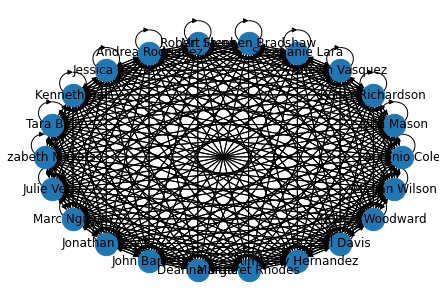

In [212]:
handover_of_work(HelpDesk_log)

Subcontracting

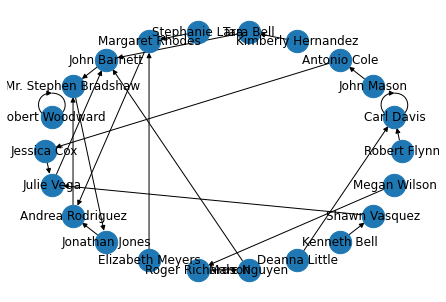

In [213]:
subcontracting(HelpDesk_log)

Working Together

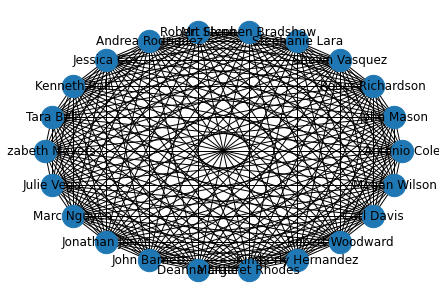

In [214]:
working_together(HelpDesk_log)

Similar Activities

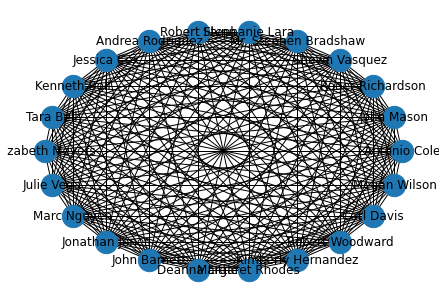

In [215]:
similar_activities(HelpDesk_log)

Roles Discovery

In [216]:
role_discovery(HelpDesk_log)

Activities: ['Assign seriousness', 'Closed', 'Create SW anomaly', 'Insert ticket', 'Require upgrade', 'Resolve ticket', 'Take in charge ticket', 'Wait'] Originators importance {'Stephanie Lara': 996, 'Tara Bell': 962, 'Robert Flynn': 1057, 'Roger Richardson': 974, 'Margaret Rhodes': 970, 'Megan Wilson': 971, 'Jonathan Jones': 939, 'Shawn Vasquez': 941, 'Elizabeth Meyers': 932, 'Kenneth Bell': 970, 'Marc Nguyen': 898, 'Andrea Rodriguez': 948, 'Jessica Cox': 938, 'Robert Woodward': 964, 'John Mason': 1000, 'John Barnett': 967, 'Carl Davis': 965, 'Julie Vega': 979, 'Antonio Cole': 986, 'Kimberly Hernandez': 962, 'Deanna Little': 1011, 'Mr. Stephen Bradshaw': 992}
Activities: ['DUPLICATE'] Originators importance {'Elizabeth Meyers': 1}
Activities: ['INVALID'] Originators importance {'Andrea Rodriguez': 1, 'Stephanie Lara': 1}
Activities: ['RESOLVED'] Originators importance {'Jonathan Jones': 1, 'Carl Davis': 1}
Activities: ['Resolve SW anomaly'] Originators importance {'Jessica Cox': 2, 'K

Clustering (SNA results)

In [217]:
clustering(HelpDesk_log)

clustered similar activities metric: {'0': ['Kimberly Hernandez', 'Jessica Cox', 'Deanna Little', 'Robert Woodward', 'Andrea Rodriguez', 'Julie Vega', 'Robert Flynn', 'Jonathan Jones'], '2': ['Megan Wilson', 'Roger Richardson', 'Tara Bell', 'Antonio Cole', 'John Mason', 'Margaret Rhodes', 'John Barnett', 'Elizabeth Meyers', 'Stephanie Lara', 'Marc Nguyen'], '1': ['Carl Davis', 'Mr. Stephen Bradshaw', 'Kenneth Bell', 'Shawn Vasquez']}
 working together clustered metric: {'1': ['Kimberly Hernandez', 'Tara Bell', 'John Mason', 'Robert Woodward', 'Stephanie Lara'], '0': ['Megan Wilson', 'Jessica Cox', 'Shawn Vasquez', 'Elizabeth Meyers', 'Marc Nguyen'], '4': ['Roger Richardson', 'Deanna Little', 'Antonio Cole', 'Kenneth Bell', 'Andrea Rodriguez', 'Jonathan Jones'], '2': ['Carl Davis', 'Mr. Stephen Bradshaw', 'Margaret Rhodes', 'John Barnett', 'Julie Vega'], '3': ['Robert Flynn']}


Resource Profiles

In [218]:
#resource_profile(HelpDesk_log)

Organizational Mining


In [219]:
organizational_mining(HelpDesk_log)


group_relative_focus
{'Stephanie Lara': {'Assign seriousness': 0.04414742810854597, 'Take in charge ticket': 0.049209486166007906, 'Resolve ticket': 0.047160345173590204, 'Closed': 0.047660690861390465, 'Insert ticket': 0.025423728813559324, 'Wait': 0.04784688995215311, 'Create SW anomaly': 0.014925373134328358, 'Require upgrade': 0.01680672268907563, 'VERIFIED': 0.0, 'DUPLICATE': 0.0, 'Resolve SW anomaly': 0.0, 'Schedule intervention': 0.2, 'RESOLVED': 0.0, 'INVALID': 0.5}, 'Carl Davis': {'Assign seriousness': 0.046172539489671933, 'Take in charge ticket': 0.043280632411067194, 'Resolve ticket': 0.044551475015051176, 'Closed': 0.048316571928290336, 'Insert ticket': 0.059322033898305086, 'Wait': 0.041695146958304855, 'Create SW anomaly': 0.014925373134328358, 'Require upgrade': 0.05042016806722689, 'VERIFIED': 0.0, 'DUPLICATE': 0.0, 'Resolve SW anomaly': 0.0, 'Schedule intervention': 0.0, 'RESOLVED': 0.5, 'INVALID': 0.0}, 'Mr. Stephen Bradshaw': {'Assign seriousness': 0.04475496152288